# Anomaly calculations

In [1]:
# Imports
from earthkit.transforms import aggregate as ek_aggregate
from earthkit import data as ek_data
from earthkit.data.testing import earthkit_remote_test_data_file
ek_data.settings.set("cache-policy", "user")


## Load some test data

In this example we will use hourly ERA5 2m temperature data on a 0.5x0.5 spatial grid for the year 2015 as
our physical data; and we will use the NUTS geometries which are stored in a geojson file.

All `earthkit-aggregate` methods can be called with `earthkit-data` objects (Readers and Wrappers) or with a pre-loaded `xarray`. To reduce the number of conversions in the example, we will convert to xarray in the first cell and use that data object for all subsequent steps.

In [2]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_era5_file = earthkit_remote_test_data_file("test-data", "era5_temperature_france_2015_2016_2017_3deg.grib")
era5_data = ek_data.from_source("url", remote_era5_file)

# convert to xarray to save repeated conversion in further steps
era5_xr = era5_data.to_xarray(xarray_open_dataset_kwargs=dict(time_dims=["valid_time"]))
era5_xr

<xarray.Dataset> Size: 111kB
Dimensions:     (number: 1, valid_time: 542, surface: 1, latitude: 7,
                 longitude: 7)
Coordinates:
  * number      (number) int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 4kB 2015-01-01 ... 2017-03-31T12:...
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude   (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
Data variables:
    t2m         (number, valid_time, surface, latitude, longitude) float32 106kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-12T08:59 GRIB to CDM+CF via cfgrib-0.9.1...

## Calculate the daily climatology of the ERA5 data

In [3]:
climatology_daily_mean = ek_aggregate.climatology.daily_mean(era5_xr)
climatology_daily_mean

<xarray.Dataset> Size: 19kB
Dimensions:    (dayofyear: 91, number: 1, surface: 1, latitude: 7, longitude: 7)
Coordinates:
  * number     (number) int64 8B 0
  * surface    (surface) float64 8B 0.0
  * latitude   (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude  (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * dayofyear  (dayofyear) int64 728B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
Data variables:
    t2m        (dayofyear, number, surface, latitude, longitude) float32 18kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-12T08:59 GRIB to CDM+CF via cfgrib-0.9.1...

## Calculate the anomaly and relative anomaly

In [4]:
anomaly = ek_aggregate.climatology.anomaly(era5_xr, climatology_daily_mean)
anomaly

<xarray.Dataset> Size: 168kB
Dimensions:      (number: 1, surface: 1, latitude: 7, longitude: 7,
                  valid_time: 821)
Coordinates:
  * number       (number) int64 8B 0
  * surface      (surface) float64 8B 0.0
  * latitude     (latitude) float64 56B 48.0 45.0 42.0 39.0 36.0 33.0 30.0
  * longitude    (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * valid_time   (valid_time) datetime64[ns] 7kB 2015-01-01 ... 2017-03-31
Data variables:
    t2m_anomaly  (number, valid_time, surface, latitude, longitude) float32 161kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-12T08:59 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
relative_anomaly = ek_aggregate.climatology.relative_anomaly(
    era5_xr, climatology_daily_mean
)
relative_anomaly

<xarray.Dataset> Size: 168kB
Dimensions:               (number: 1, surface: 1, latitude: 7, longitude: 7,
                           valid_time: 821)
Coordinates:
  * number                (number) int64 8B 0
  * surface               (surface) float64 8B 0.0
  * latitude              (latitude) float64 56B 48.0 45.0 42.0 ... 33.0 30.0
  * longitude             (longitude) float64 56B 0.0 3.0 6.0 9.0 12.0 15.0 18.0
  * valid_time            (valid_time) datetime64[ns] 7kB 2015-01-01 ... 2017...
Data variables:
    t2m_relative anomaly  (number, valid_time, surface, latitude, longitude) float32 161kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-12T08:59 GRIB to CDM+CF via cfgrib-0.9.1...

# Plot the output for a random location

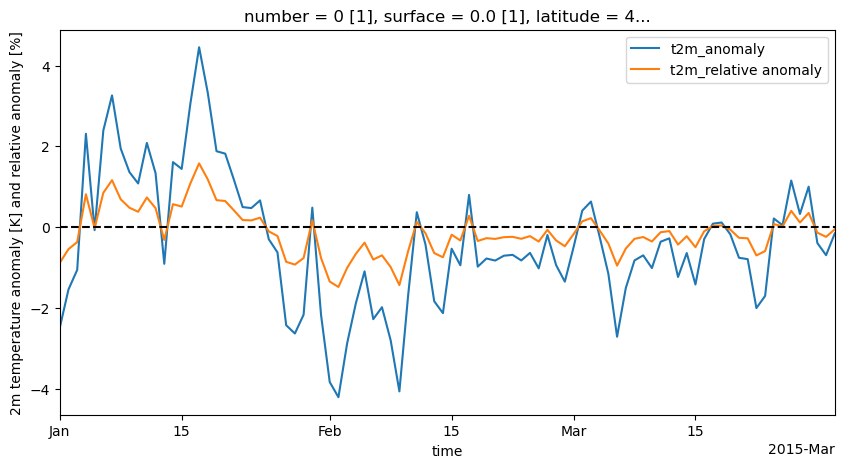

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime

start, end = datetime(2015,1,1), datetime(2015,3,31)

isel_kwargs = {"latitude":2, "longitude":4}
sel_kwargs = {"valid_time": slice(start, end)}

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for data in [anomaly, relative_anomaly]:
    var_name = list(data.data_vars.keys())[0]
    p_data = data[var_name].isel(**isel_kwargs).sel(**sel_kwargs)
    p_data.plot(ax=ax, label=var_name)

ax.set_xlim(start, end)
ax.set_ylabel("2m temperature anomaly [K] and relative anomaly [%]")
ax.hlines(0, xmin=start, xmax=end, color="black", linestyle="--")
ax.legend()

